In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')

print(df.columns)

/kaggle/input/bostonhoustingmlnd/housing.csv
Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')


In [2]:
print(df.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [3]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [4]:
X = df.drop(columns = 'MEDV')
print(X)

        RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
484  6.593   9.67     21.0
485  6.120   9.08     21.0
486  6.976   5.64     21.0
487  6.794   6.48     21.0
488  6.030   7.88     21.0

[489 rows x 3 columns]


In [5]:
y = df['MEDV']
print(y)

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)
c = lr.intercept_
m = lr.coef_

print(c)
print(m)

386746.9093974322
[ 96724.54357882  -9881.92207266 -21992.81322672]


In [9]:
y_pred_train = lr.predict(X_train)

In [10]:
r2_score(y_train, y_pred_train)

0.7484592038702251

In [11]:
y_pred_test = lr.predict(X_test)
r2_score(y_test, y_pred_test)

0.6850276093974875

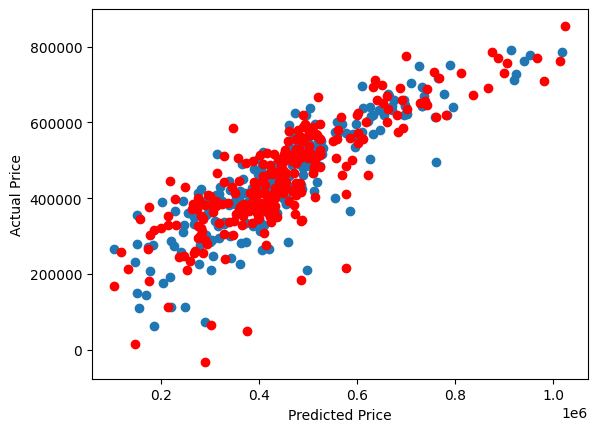

In [12]:
plt.scatter(y_train, y_pred_train)

plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')

plt.scatter(y_test, y_pred_test, color='red')